# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader
from sklearn.metrics import r2_score

C:\Program Files\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Importing the dataset

In [2]:
start_date = '2017-06-12'
end_date = '2020-06-12'

In [3]:
data = pandas_datareader.data.get_data_yahoo('^NSEI', start_date, end_date)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-12,9647.049805,9598.500000,9646.700195,9616.400391,141400.0,9616.400391
2017-06-13,9654.150391,9595.400391,9615.549805,9606.900391,129700.0,9606.900391
2017-06-14,9627.400391,9580.450195,9621.549805,9618.150391,181800.0,9618.150391
2017-06-15,9621.400391,9560.799805,9617.900391,9578.049805,171100.0,9578.049805
2017-06-16,9615.849609,9565.500000,9595.450195,9588.049805,213200.0,9588.049805


In [4]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.992939,0.996081,0.996655,-0.177139,0.996655
Low,0.992939,1.000000,0.996305,0.995607,-0.233600,0.995607
Open,0.996081,0.996305,1.000000,0.992810,-0.202624,0.992810
Close,0.996655,0.995607,0.992810,1.000000,-0.206424,1.000000
Volume,-0.177139,-0.233600,-0.202624,-0.206424,1.000000,-0.206424
Adj Close,0.996655,0.995607,0.992810,1.000000,-0.206424,1.000000


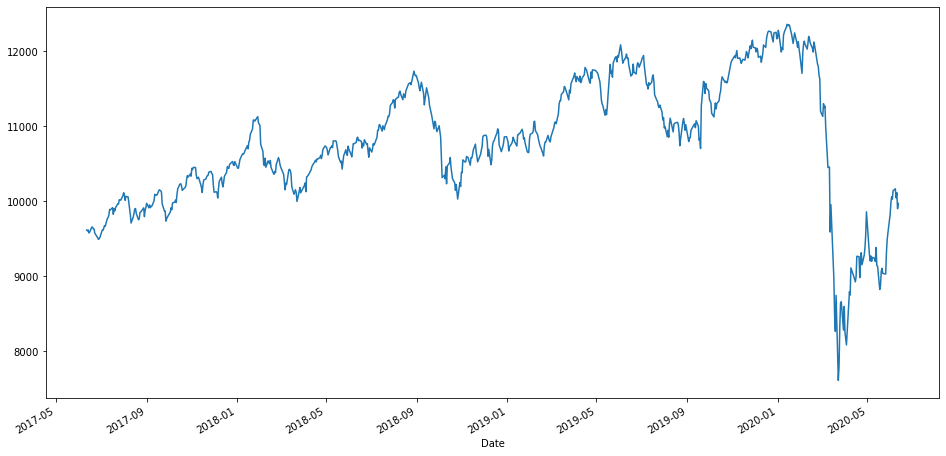

In [5]:
plt.figure(figsize=(16,8))
data['Close'].plot()
plt.show()

In [6]:
X=data[0:len(data)-1][['Adj Close']]
y=data[1:len(data)][['Adj Close']].rename(columns={'Adj Close': 'Close'})

## Splitting the dataset into the Training set and Test set

In [7]:
d = 100
X_train = X.head(X.shape[0]-d)
y_train = y.head(X.shape[0]-d)
X_test = X.tail(d) 
y_test = y.tail(d)

## Training the Simple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
r2_score(y_test, regressor.predict(X_test))

0.9652480552078883

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[12355.95 12343.3 ]
 [12337.09 12355.5 ]
 [12349.2  12352.35]
 [12346.07 12224.55]
 [12219.19 12169.85]
 [12164.88 12106.9 ]
 [12102.38 12180.35]
 [12175.31 12248.25]
 [12242.72 12119.  ]
 [12114.4  12055.8 ]
 [12051.65 12129.5 ]
 [12124.82 12035.8 ]
 [12031.79 11962.1 ]
 [11958.62 11707.9 ]
 [11706.25 11979.65]
 [11976.05 12089.15]
 [12084.76 12137.95]
 [12133.21 12098.35]
 [12093.89 12031.5 ]
 [12027.52 12107.9 ]
 [12103.38 12201.2 ]
 [12196.01 12174.65]
 [12169.65 12113.45]
 [12108.89 12045.8 ]
 [12041.72 11992.5 ]
 [11988.8  12125.9 ]
 [12121.25 12080.85]
 [12076.52 11829.4 ]
 [11826.88 11797.9 ]
 [11795.6  11678.5 ]
 [11677.06 11633.3 ]
 [11632.18 11201.75]
 [11203.73 11132.75]
 [11135.23 11303.3 ]
 [11304.55 11251.  ]
 [11252.63 11269.  ]
 [11270.5  10989.45]
 [10992.96 10451.45]
 [10458.82 10458.4 ]
 [10465.72  9590.15]
 [ 9603.7   9955.2 ]
 [ 9966.13  9197.4 ]
 [ 9213.77  8967.05]
 [ 8985.07  8468.8 ]
 [ 8490.4   8263.45]
 [ 8286.53  8745.45]
 [ 8765.07  7610.25]
 [ 7638.02  7

## Visualising the Training set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


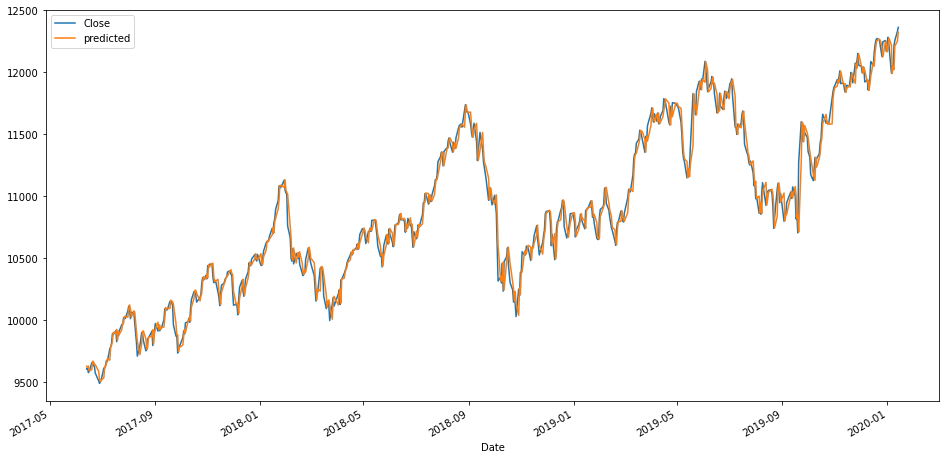

In [10]:
y_plt = y_train[:]
y_plt['predicted'] = np.array(regressor.predict(X_train))
plt.figure(figsize=(16,8))
y_train['Close'].plot()
y_plt['predicted'].plot()
plt.legend()

## Visualising the Test set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


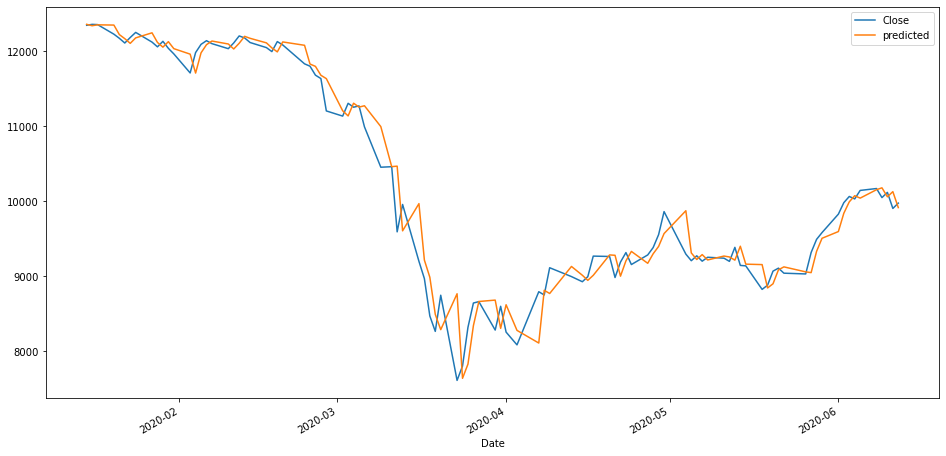

In [11]:
y_plt2 = y_test[:]
y_plt2['predicted'] = np.array(regressor.predict(X_test))
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_plt2['predicted'].plot()
plt.legend()

## Visualising the Future set results

In [12]:
n=1
y_future = y_test[:].rename(columns={'Close': 'Future'})
for i in range(n+1,d):
    y_future['Future'][i] = regressor.predict([y_future.iloc[i-n-1:i-1,0]])

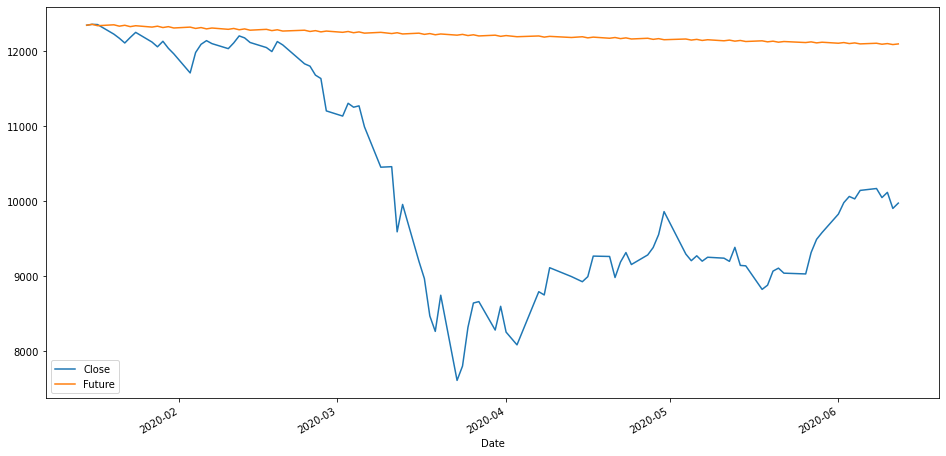

In [13]:
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_future['Future'].plot()
plt.legend()

In [14]:
r2_score(y_test.tail(d-n).values, y_future.tail(d-n).values)

-1.9827567523754581